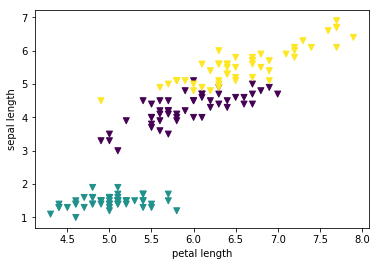

In [45]:
# iris_fitting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None) 
X = df.iloc[:, [0, 2]].values
y = df.iloc[:, [-1]].values[:,0] 
for i,c in enumerate(set(y)):
    y[y==c]=i
y = y.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], c=y,marker='v')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.show()

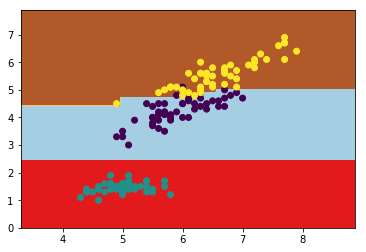

0.98


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=200, learning_rate=0.8)
bdt.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()
print(bdt.score(X,y))